In [1]:
# importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Checking the structure of data

In [2]:
# importing dataset
data = pd.read_csv('day.csv')
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
data.shape

(730, 16)

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data cleaning

In [6]:
# null value check
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values are present in this data.

In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# slecting the relevant columns for analysis.
df_1 = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [9]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# checking the shape of new dataframe.
df_1.shape

(730, 12)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Visualisation of data.

<Figure size 1080x1224 with 0 Axes>

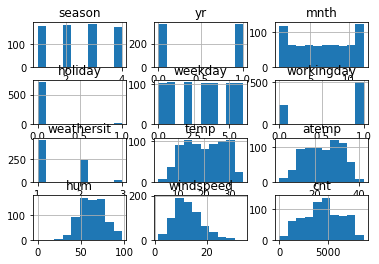

In [16]:
# Univariate Analysis
plt.figure(figsize=(15, 17))
df_1.hist(rwidth = 1)
plt.show()

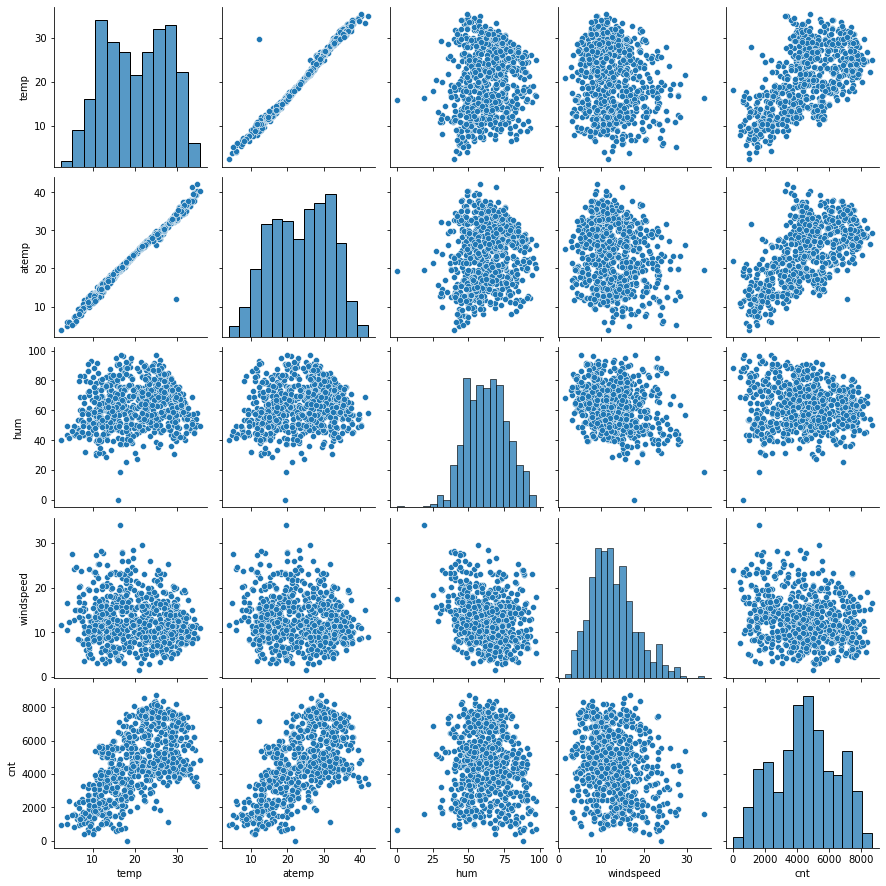

In [17]:
# visualising numerical variables
sns.pairplot(df_1, vars =('temp','atemp','hum','windspeed','cnt'))
plt.show()

* there is a linear relation between temp and cnt and also with atemp and cnt.
* Such a relationship is not seen with humidity and windspeeed.

<AxesSubplot:>

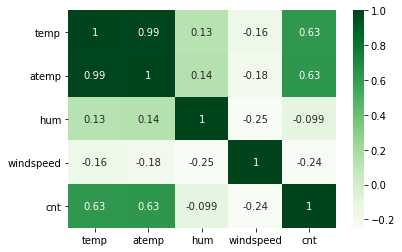

In [18]:
# checking correlation b/w continuous variables.
c_var=df_1[['temp','atemp','hum','windspeed','cnt']]
correlation = c_var.corr()
# plotting it in the heat map:

sns.heatmap(data=correlation,annot = True, cmap="Greens")

In [19]:
#since temp and atemp are highly correlated we can drop atemp.
df_1 = df_1.drop(['atemp'],axis =1)
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


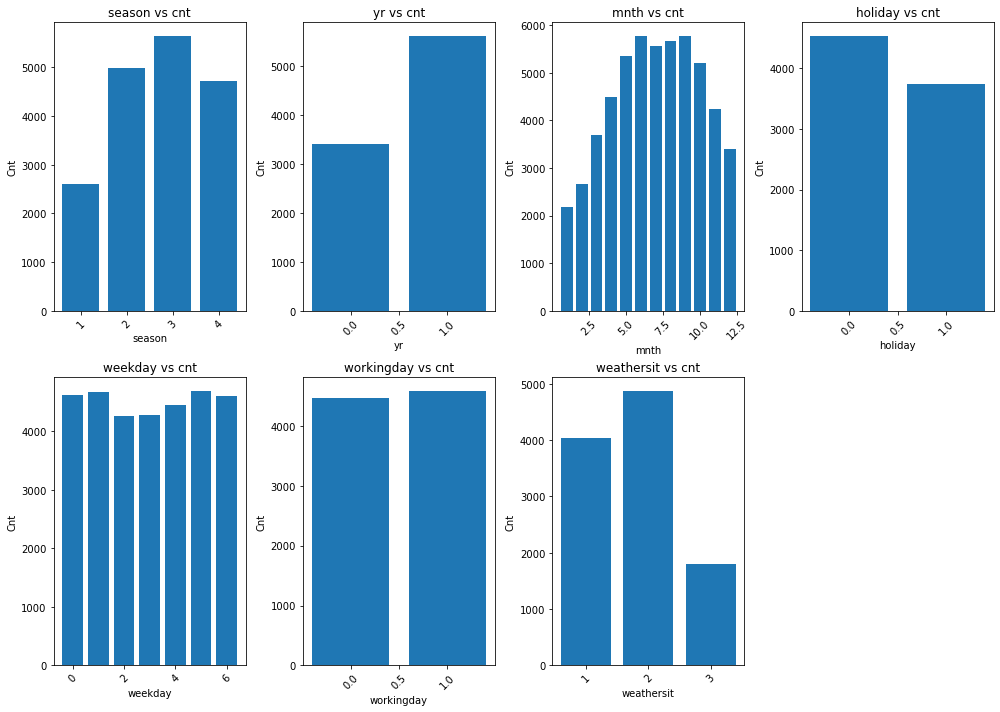

In [20]:
# Plotting the Categorical Values against the avg count of Target Variable:

catgrcl = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize = (14,10))
i = 1
for col in catgrcl:
    cat_Unq = df_1[col].unique()
    cat_avg = df_1.groupby(col)['cnt'].mean()
    plt.subplot(2,4,i)
    title = col  + ' vs cnt'
    plt.bar(cat_Unq,cat_avg)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Cnt')
    plt.xticks(rotation =45)
    i += 1

plt.tight_layout()    
plt.show()

#### Inferences made from plot
 * The variable 'yr' , 'mnth', 'holiday' shows some relationship with 'cnt'.
 * The variable 'season' and 'weathersit' also shows linear relationship with the target variable.
 * year 2019 shows an increase in count.

### Creating Dummy variables for categorical data

In [21]:
# season can be identified using three columns so that we can remove first column in dummy_column.
dummy_season=pd.get_dummies(df_1['season'], drop_first=True)
dummy_season.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


- 000= season1(spring)
- 100= season2(summer)
- 010= season3(fall)
- 001= season4(winter)

In [22]:
dummy_season=dummy_season.rename(columns={1:'spring', 2: "summer", 3: "fall",4:"winter"})
dummy_season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [23]:
dummy_weekday = pd.get_dummies(df_1['weekday'], drop_first = True)
dummy_weekday.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [24]:
dummy_weekday=dummy_weekday.rename({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"},axis=1)
dummy_weekday.head(7)

,monday,tuesday,wednesday,thursday,friday,saturday
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1
6,0,0,0,0,0,0


* 100000 - Monday
* 010000 - Tuesday
* 001000 - Wedensday
* 000100 - Thursday
* 000010 - Friday
* 000001 - Saturday
* 000000 - Sunday

In [25]:
dummy_mnth = pd.get_dummies(df_1['mnth'], drop_first = True)
dummy_mnth.head(12)

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [26]:
dummy_mnth=dummy_mnth.rename(columns={1: "january", 2: "february", 3: "march",4:"april",5:"may",6:"june",7:"july",8:"august",9:"september",10:"october",11:"november",12:"december"})
dummy_mnth.head()

,february,march,april,may,june,july,august,september,october,november,december
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


- 00000000000= january
- 10000000000= february
- 01000000000= march
- 00100000000= april
- 00010000000= may
- 00001000000= june
- 00000100000= july
- 00000010000= august
- 00000001000= september
- 00000000100= october
- 00000000010= november
- 00000000001 = december

In [27]:
dummy_weathersit=pd.get_dummies(df_1["weathersit"])
dummy_weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
df_1["weathersit"].describe()


count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

- since the column have the maximum value of 3 against the description we need only 2 dummy variables.

In [29]:
dummy_weathersit=pd.get_dummies(df_1["weathersit"],drop_first= True)
dummy_weathersit.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


- 00 =Clear
- 10 =Mist + Cloudy 
- 01 =Light Snow

In [30]:
dummy_weathersit=dummy_weathersit.rename(columns={1:"Clear",2:"Mist + Cloudy",3:"Light Snow"})
dummy_weathersit.head()

,Mist + Cloudy,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [31]:
dummy_year=pd.get_dummies(df_1["yr"])
dummy_year.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
dummy_year=pd.get_dummies(df_1["yr"],drop_first = True)
dummy_year.tail()

,1
725,1
726,1
727,1
728,1
729,1


* 0 - yr_2018
* 1 - yr_2019


In [33]:
dummy_year = dummy_year.rename(columns = {0:'yr_2018', 1:'yr_2019'})
dummy_year.head()

,yr_2019
0,0
1,0
2,0
3,0
4,0


In [34]:
# Add the results to the original data dataframe

df_1 = pd.concat([df_1,dummy_season,dummy_mnth,dummy_weekday,dummy_weathersit,dummy_year], axis = 1)
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,december,monday,tuesday,wednesday,thursday,friday,saturday,Mist + Cloudy,Light Snow,yr_2019
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# Drop 'season,mnth,weekday,weathersit' as we have created the dummies for it
var=["season","mnth","weekday","weathersit","yr"]
df_1.drop(var, axis = 1, inplace = True)
df_1.head()

,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,february,...,december,monday,tuesday,wednesday,thursday,friday,saturday,Mist + Cloudy,Light Snow,yr_2019
0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Splitting the Data into Train and Test Set.

In [36]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df_1,train_size=.7,test_size=.3,random_state=100)

### Rescaling the data

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [38]:
# Apply scaler() to the continuous columns
cont_var=["temp","hum","windspeed","cnt"]
df_train[cont_var]=scaler.fit_transform(df_train[cont_var])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,february,...,december,monday,tuesday,wednesday,thursday,friday,saturday,Mist + Cloudy,Light Snow,yr_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


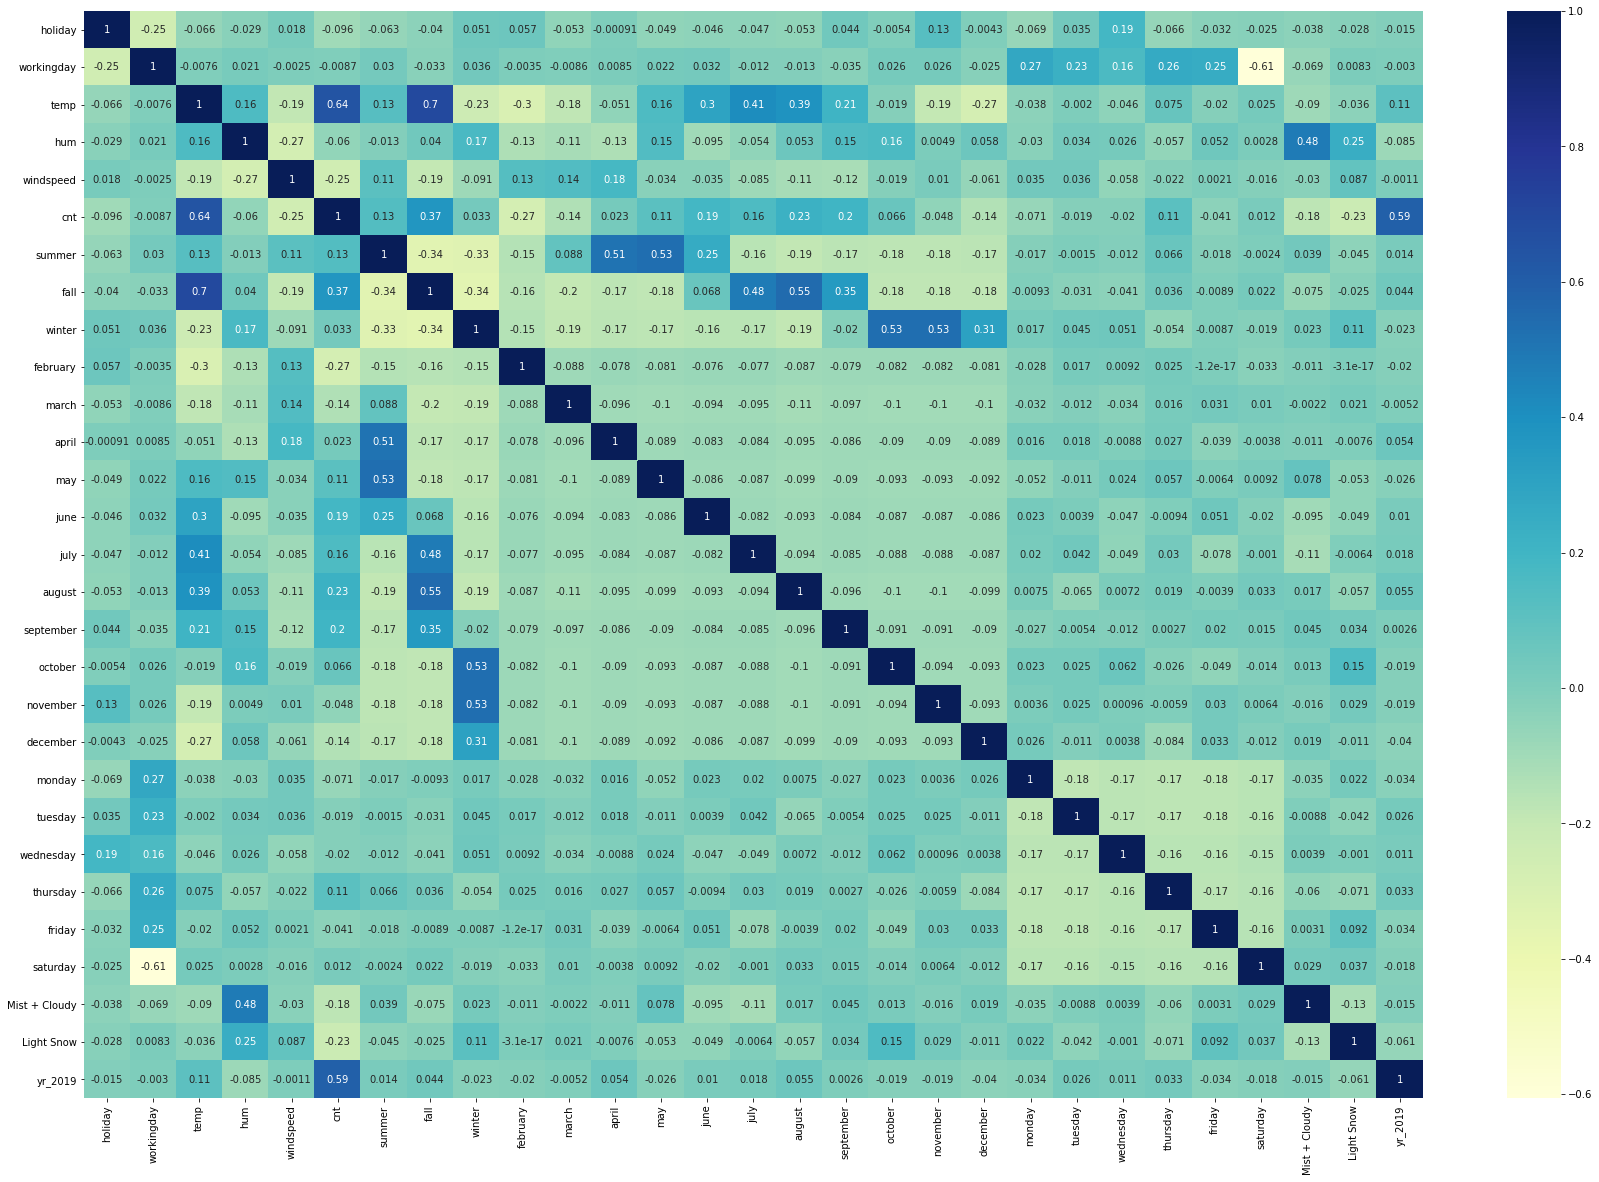

In [39]:
# check for the correlation between the columns
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

Here some of the variables are highly correlated with each other.

In [40]:
# Dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model

In [41]:
# We'll build the model using RFE and thus we'll import the imp Libraries to perfrom our action:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('february', False, 10),
 ('march', True, 1),
 ('april', False, 2),
 ('may', True, 1),
 ('june', False, 3),
 ('july', False, 11),
 ('august', True, 1),
 ('september', True, 1),
 ('october', True, 1),
 ('november', False, 12),
 ('december', False, 13),
 ('monday', False, 8),
 ('tuesday', False, 9),
 ('wednesday', False, 7),
 ('thursday', False, 5),
 ('friday', False, 6),
 ('saturday', False, 14),
 ('Mist + Cloudy', True, 1),
 ('Light Snow', True, 1),
 ('yr_2019', True, 1)]

In [44]:
# Adding the 15 columns in the col variable using RFE
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'march', 'may', 'august', 'september', 'october', 'Mist + Cloudy',
       'Light Snow', 'yr_2019'],
      dtype='object')

#### Building model using statsmodel.

In [45]:
X_train_RFE=X_train[col]
X_train_RFE

,holiday,temp,hum,windspeed,summer,fall,winter,march,may,august,september,october,Mist + Cloudy,Light Snow,yr_2019
653,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,1,0,0,1
576,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,0,1,0,1
728,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,1
482,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,0.824514,0.605840,0.355596,1,0,0,0,0,0,0,0,1,0,1
578,0,0.863973,0.679690,0.187140,0,1,0,0,0,1,0,0,0,0,1
53,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1,0,0


In [46]:
import statsmodels.api as sm
X_train_RFE=sm.add_constant(X_train_RFE)
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [47]:
 # Running the linear model and getting its summary
lm=sm.OLS(y_train,X_train_RFE).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.95e-189
Time:                        17:45:30   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2376      0.027      8.689

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_RFE
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.50
6,fall,6.49
2,temp,3.84
5,summer,2.82
7,winter,2.38
3,hum,1.94
10,august,1.68
9,may,1.56
13,Mist + Cloudy,1.56
12,october,1.52


- Month may have high pvalue so that we can drop it first.

In [49]:
X_train_1=X_train_RFE.drop(['may'],axis=1)
X_train_1.head()

,const,holiday,temp,hum,windspeed,summer,fall,winter,march,august,september,october,Mist + Cloudy,Light Snow,yr_2019
653,1.0,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,1,0,0,1
576,1.0,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,1
426,1.0,0,0.442393,0.640189,0.255342,0,0,0,1,0,0,0,1,0,1
728,1.0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,1
482,1.0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0,1


### Model 2

In [50]:
X_train_1=sm.add_constant(X_train_1)
lm=sm.OLS(y_train,X_train_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          9.02e-190
Time:                        17:45:30   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2321      0.027      8.530

In [51]:
# Calculate the VIFs
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
6,fall,6.29
2,temp,3.72
5,summer,2.65
7,winter,2.34
3,hum,1.91
9,august,1.68
12,Mist + Cloudy,1.56
11,october,1.52
10,september,1.40


- here fall have high p value and VIF sothat we can drop it.

In [52]:
X_train_2= X_train_1.drop(['fall'], axis=1)

### Model 3

In [53]:
X_train_2=sm.add_constant(X_train_2)
lm=sm.OLS(y_train,X_train_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.26e-190
Time:                        17:45:30   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2324      0.027      8.529

In [54]:
# Calculate the VIFs

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.84
3,hum,1.87
6,winter,1.79
2,temp,1.62
11,Mist + Cloudy,1.56
10,october,1.49
8,august,1.46
5,summer,1.38
9,september,1.25
12,Light Snow,1.24


- since March have high p value we can drop it.

In [55]:
X_train_3= X_train_2.drop(['march'], axis=1)

### Model 4

In [56]:
lm=sm.OLS(y_train,X_train_3).fit()
lm=sm.OLS(y_train,X_train_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.02e-191
Time:                        17:45:30   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.848

In [57]:
# Calculate the VIFs

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.87
3,hum,1.87
6,winter,1.72
2,temp,1.59
10,Mist + Cloudy,1.56
9,october,1.49
7,august,1.45
5,summer,1.38
8,september,1.24
11,Light Snow,1.24


- since p value of october is higher, we can drop it.

In [58]:
# dropping the column october
X_train_4= X_train_3.drop(['october'], axis=1)

In [59]:
lm=sm.OLS(y_train,X_train_4).fit()
lm=sm.OLS(y_train,X_train_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.43e-191
Time:                        17:45:30   Log-Likelihood:                 508.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     498   BIC:                            -941.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2317      0.027      8.607

In [60]:
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.18
3,hum,1.86
9,Mist + Cloudy,1.56
2,temp,1.54
7,august,1.44
5,summer,1.37
6,winter,1.32
10,Light Snow,1.23
8,september,1.21
4,windspeed,1.18


- Since all the VIFs and pvalues are within the allowed range and r^2  and adjusted r^2 values sounds good . So we can finalise our model.

## Residual analysis of Train data.

In [61]:
# predicting the data based on the model
y_train_cnt = lm.predict(X_train_4)

Text(0.5, 0, 'Errors')

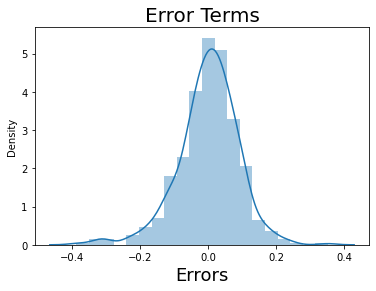

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

- Here error terms follows a normal distribution thus our assumption on linear regression holds.

## Predictions

- Here we can make predictions on final model. 

In [63]:
# applying scaling
cont_var

['temp', 'hum', 'windspeed', 'cnt']

In [64]:
df_test[cont_var] = scaler.transform(df_test[cont_var])
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,february,...,december,monday,tuesday,wednesday,thursday,friday,saturday,Mist + Cloudy,Light Snow,yr_2019
184,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
535,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Dividing into X_test and y_test.

In [65]:
X_test = df_test
y_test = df_test.pop('cnt')

In [66]:
# removing the unwanted column
X_train_4.columns
X_train_4= X_train_4.drop(['const'], axis=1)

In [67]:
# Creating new dataframe by dropping variables from X_test which are dropped in model building
X_test_n = X_test[X_train_4.columns]

# Adding a constant variable 
X_test_n = sm.add_constant(X_test_n)
X_test_n.head()

,const,holiday,temp,hum,windspeed,summer,winter,august,september,Mist + Cloudy,Light Snow,yr_2019
184,1.0,1,0.831783,0.657364,0.084219,0,0,0,0,1,0,0
535,1.0,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,1
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,0,1,0,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,1,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [68]:
# Making predictions
y_pred = lm.predict(X_test_n)
y_pred

184    0.399159
535    0.913948
299    0.393071
221    0.623456
152    0.621654
         ...   
400    0.367386
702    0.703597
127    0.522791
640    0.802914
72     0.283134
Length: 219, dtype: float64

### Evaluating the model

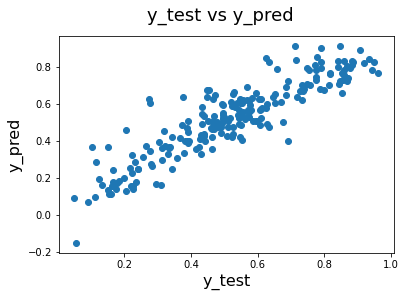

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)              
plt.xlabel('y_test', fontsize=16)                        
plt.ylabel('y_pred', fontsize=16) 
plt.show()

- here y_test and y_pred are distributed linearly which implies that our model is good.

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [71]:
# calculating r square
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
mse,r_squared

(0.009282456663691693, 0.8045626124663317)

In [72]:
n=X_test_n.shape[0]
p=X_test_n.shape[1]
adjusted_r_2=1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_2

0.7931779102799044

- r_square_value of train_set =0.843
- r_square_value of test_set  =0.804
- adjusted_r_square_value of train_set =0.838
- adjusted_r_square_value of test_set  =0.793

- The difference of r_squared_values within the tolerable limit
- mse is 0.9% which indicates that only 0.9% of test cases are failed

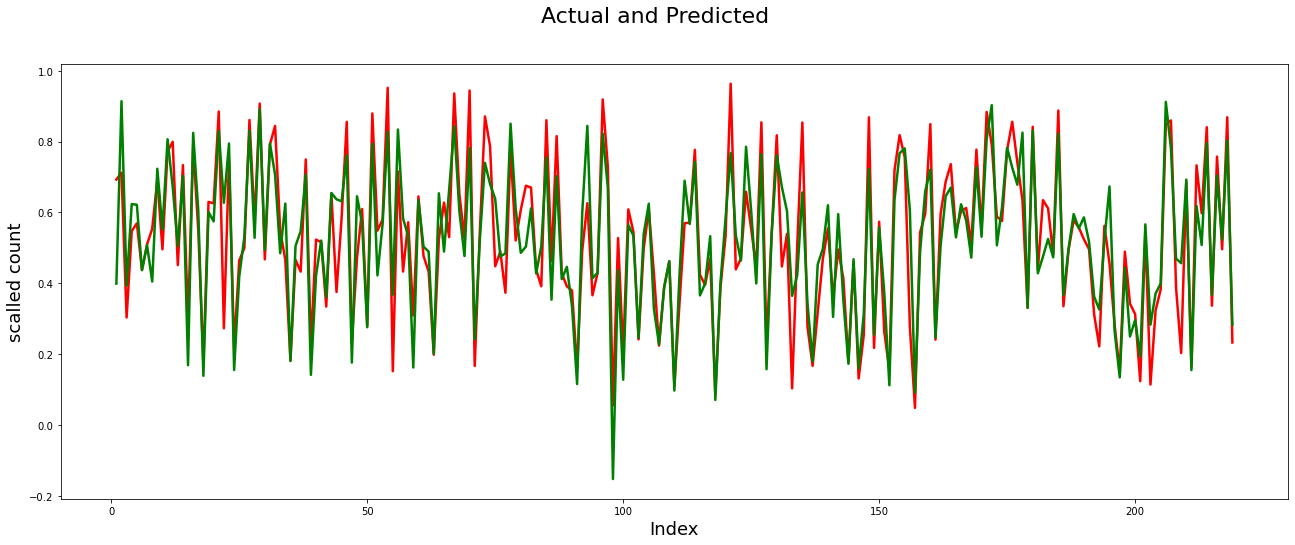

In [73]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(22,8))
plt.plot(c,y_test, color="red", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="green",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=22)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('scalled count', fontsize=18)
plt.show()

- From the above figure it is clear that the model predicts good except in few points , which is an acceptable error

In [74]:
lm.params

const            0.231667
holiday         -0.095802
temp             0.539510
hum             -0.175922
windspeed       -0.183465
summer           0.102964
winter           0.148245
august           0.055338
september        0.122223
Mist + Cloudy   -0.054365
Light Snow      -0.235122
yr_2019          0.228567
dtype: float64

### equation of best fitted line:

- cnt = (0.539 * temp)+(0.102 * summer)+(.148 * winter)+(0.05 * august)+(0.122 * september)+(0.228 * yr_2019)-(0.096 * holiday)-(0.175 * hum)-(0.183 * windspeed)-(0.0543 * mist+cloudy)-(0.235 * light snow)

### Inferences
- Demands increases in the month of august ,september and also when the seasons are 'summer' and 'winter', also the demand has a strong coeff with the temp. So that has to be also taken into account.

- Demand decreases if it is holiday,humidity, Light Snow_Light Rain + Thunderstorm + Scattered clouds_Light Rain + Scattered clouds, Mist_cloudy
